<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [ ]:
#Verificamos información del DataFrame
Micro_Retailer.info()

In [6]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [ ]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Micro_Retailer['214_customer_relationship_tools'].value_counts().reset_index()
Tabla_freq

In [9]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>1]
Filtro

,214_customer_relationship_tools,count
0,Redes sociales,27
1,Aplicación móvil,21
2,Ninguna,20
3,"Aplicación móvil,Redes sociales",13
4,Cuaderno,6


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('214_customer_relationship_tools')
Filtro_index

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(8,3), color= "red")
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

In [ ]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["count"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**Determinación de Clases para datos agrupados**


In [ ]:
#Calculamos el numero total de la población "n"
Micro_Retailer['104_how_many_shelves_does_the_micro_retailer_have']. info()
n=171

In [19]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Micro_Retailer['104_how_many_shelves_does_the_micro_retailer_have'].max()
Min=Micro_Retailer['104_how_many_shelves_does_the_micro_retailer_have'].min()
Limites= [Min, Max]
Limites

[0, 150]

In [20]:
#Calculamos el rango R
R=Max-Min
R

150

In [21]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
ni

np.float64(8.41354708650195)

In [22]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

np.float64(17.828390149577757)

**Creación de Categorias a partir de clases**

In [24]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 150.1, 9)
intervalos

array([-1.00000e-01,  1.86750e+01,  3.74500e+01,  5.62250e+01,
        7.50000e+01,  9.37750e+01,  1.12550e+02,  1.31325e+02,
        1.50100e+02])

In [26]:
#Creamos las categorías 
categorias= ["Categoría1 (0 a 18)", "Categoría2 (19 a 37)","Categoría3 (38 a 56)", "Categoría4 (57 a 75)",
             "Categoría5 (76 a 93)", "Categoría6 (94 a 112)","Categoría7 (113 a 131)", "Categoría8 (131 a 150)"]

In [27]:
#Finalmente creamos las categorías en la columna numérica
Micro_Retailer['104_how_many_shelves_does_the_micro_retailer_have']=pd.cut(x= Micro_Retailer['104_how_many_shelves_does_the_micro_retailer_have'], bins=intervalos, labels= categorias)
Micro_Retailer['104_how_many_shelves_does_the_micro_retailer_have']

0       Categoría1 (0 a 18)
1       Categoría1 (0 a 18)
2      Categoría2 (19 a 37)
3       Categoría1 (0 a 18)
4       Categoría1 (0 a 18)
               ...         
166     Categoría1 (0 a 18)
167     Categoría1 (0 a 18)
168     Categoría1 (0 a 18)
169     Categoría1 (0 a 18)
170     Categoría1 (0 a 18)
Name: 104_how_many_shelves_does_the_micro_retailer_have, Length: 171, dtype: category
Categories (8, object): ['Categoría1 (0 a 18)' < 'Categoría2 (19 a 37)' < 'Categoría3 (38 a 56)' < 'Categoría4 (57 a 75)' < 'Categoría5 (76 a 93)' < 'Categoría6 (94 a 112)' < 'Categoría7 (113 a 131)' < 'Categoría8 (131 a 150)']

In [28]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Micro_Retailer['104_how_many_shelves_does_the_micro_retailer_have'].value_counts().reset_index()
Tabla_freq

,104_how_many_shelves_does_the_micro_retailer_have,count
0,Categoría1 (0 a 18),163
1,Categoría2 (19 a 37),5
2,Categoría4 (57 a 75),1
3,Categoría8 (131 a 150),1
4,Categoría7 (113 a 131),1
5,Categoría3 (38 a 56),0
6,Categoría6 (94 a 112),0
7,Categoría5 (76 a 93),0


In [29]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

,104_how_many_shelves_does_the_micro_retailer_have,count
0,Categoría1 (0 a 18),163
1,Categoría2 (19 a 37),5
2,Categoría4 (57 a 75),1
3,Categoría8 (131 a 150),1
4,Categoría7 (113 a 131),1


In [30]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('104_how_many_shelves_does_the_micro_retailer_have')
Filtro_index

,count
104_how_many_shelves_does_the_micro_retailer_have,
Categoría1 (0 a 18),163
Categoría2 (19 a 37),5
Categoría4 (57 a 75),1
Categoría8 (131 a 150),1
Categoría7 (113 a 131),1


Text(0, 0.5, 'Frecuencia')

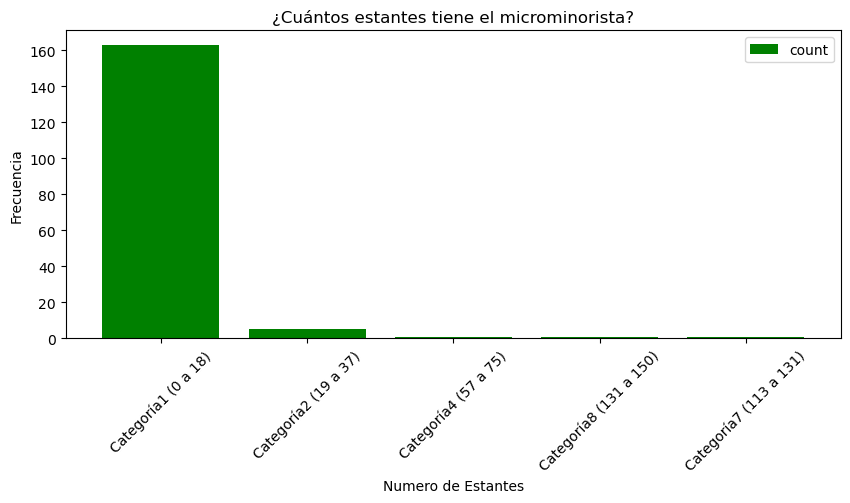

In [31]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "green", rot=45)
plt.title('¿Cuántos estantes tiene el microminorista?')
plt.xlabel('Numero de Estantes')
plt.ylabel('Frecuencia')

